In [12]:
from thundersvm import SVR
import pandas as pd
import matplotlib.pyplot as plt
from bayes_opt import BayesianOptimization

In [21]:
# thudersvm path: https://github.com/Xtra-Computing/thundersvm#getting-started

/home/wxk/DataScience/faster_svm


In [13]:
df = pd.read_hdf("/home/wxk/Data/DREAM_preterm/data/exp_ga.27.h5", key='df')

In [14]:
n = 250

x_train = df.iloc[:n, :-1]
y_train = df.iloc[:n, -1]

x_val = df.iloc[n:n+50, :-1]
y_val = df.iloc[n:n+50, -1]

x_test = df.iloc[n+50:367, :-1]
y_test = df.iloc[n+50:367, -1]

In [15]:
def evaluate(model, x, y):
    y_hat = model.predict(x)
    rmse = np.sqrt(np.mean((y_hat - y)**2))
    return rmse

In [16]:
clf = SVR(verbose=True, gamma=0.1098, C=1.062, epsilon=0.1102)
clf.fit(x_train, y_train)
y_hat_val = clf.predict(x_val)

rmse_val = np.sqrt(np.mean((y_hat_val - y_val)**2))
print("rmse on validation set", rmse_val)

rmse_test = evaluate(clf, x_test, y_test)
print("rmse on testing set", rmse_test)

rmse on validation set 0.1611545480096157
rmse on testing set 0.21488179757338355


In [19]:
# the bayesian optimization does find this setting: 
# clf = SVR(verbose=True, gamma=0.08, C=1.1, epsilon=0.095)
# You find this optimal setting by optimize each parameter from a solution from BO

def lgb_eval(gamma, c, epsilon):

    clf = SVR(verbose=True, gamma=gamma, C=c, epsilon=epsilon)
    clf.fit(x_train, y_train)
    y_hat_val = clf.predict(x_val)
    rmse = np.sqrt(np.mean((y_hat_val - y_val)**2))
    
    return -rmse # -gbm.best_score['valid_0']['l1']

  
# what is the step size 
lgbBO = BayesianOptimization(lgb_eval, {'gamma': (0.1, 100),
                                        'c': (0.1, 100),
                                        'epsilon': (0.01, 0.2)}
                                        , random_state=1)
# optimize
lgbBO.maximize(init_points=20, n_iter=150)

|   iter    |  target   |     c     |  epsilon  |   gamma   |
-------------------------------------------------------------
|  1        | -0.2619   |  54.93    |  0.1459   |  60.32    |
|  2        | -0.2618   |  54.53    |  0.09049  |  64.62    |
|  3        | -0.262    |  43.81    |  0.1794   |  96.37    |
|  4        | -0.262    |  38.41    |  0.1604   |  52.94    |
|  5        | -0.262    |  56.85    |  0.1859   |  7.197    |
|  6        | -0.2618   |  8.804    |  0.01384  |  83.28    |
|  7        | -0.262    |  77.84    |  0.1753   |  97.86    |
|  8        | -0.2618   |  79.94    |  0.09768  |  78.07    |
|  9        | -0.2619   |  11.92    |  0.1316   |  14.42    |
|  10       | -0.2618   |  94.47    |  0.1092   |  41.52    |
|  11       | -0.262    |  26.53    |  0.1571   |  45.67    |
|  12       | -0.2618   |  56.89    |  0.01357  |  61.8     |
|  13       | -0.2619   |  61.25    |  0.1272   |  94.38    |
|  14       | -0.2618   |  68.21    |  0.07831  |  43.76    |
|  15   

|  80       | -0.1876   |  58.96    |  0.1649   |  0.1349   |
|  81       | -0.262    |  23.79    |  0.1881   |  82.84    |
|  82       | -0.1916   |  80.85    |  0.09971  |  0.1156   |
|  83       | -0.1966   |  50.45    |  0.06879  |  0.1008   |
|  84       | -0.1856   |  32.43    |  0.05357  |  0.2092   |
|  85       | -0.1895   |  4.175    |  0.1331   |  0.1049   |
|  86       | -0.1891   |  65.66    |  0.03344  |  0.1746   |
|  87       | -0.1903   |  74.51    |  0.02511  |  0.1677   |
|  88       | -0.2013   |  30.5     |  0.01     |  0.1      |
|  89       | -0.1886   |  18.65    |  0.0555   |  0.1549   |
|  90       | -0.2622   |  0.1207   |  0.07334  |  53.75    |
|  91       | -0.262    |  44.8     |  0.1945   |  39.95    |
|  92       | -0.261    |  36.3     |  0.1923   |  2.818    |
|  93       | -0.262    |  40.6     |  0.194    |  22.64    |
|  94       | -0.262    |  56.57    |  0.1793   |  20.36    |
|  95       | -0.2618   |  12.73    |  0.01     |  100.0    |
|  96   

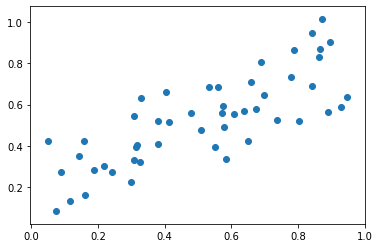

In [20]:
plt.scatter(y_val, y_hat_val)
plt.show()